# Projet numérique : choix du pas de temps
# Camille Klopocki, Damien Capéraa
## Pas fixe
### Question 1 : schéma d'Euler explicite

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def solve_euler_explicit(f, x0, dt, tf, t0=0):
    '''Résout l'équation différentielle dx/dt(t) = f(t, x) à l'aide de la
    méthode d'Euler explicite. Renvoie les listes temps et solution.'''
    T = tf - t0
    nbiter = math.floor(T/dt)
    temps = [i * dt for i in range(nbiter)]
    solution = [x0]
    for i in range(1, nbiter):
        solution.append(solution[i-1] + dt * f(i * dt, solution[i-1]))
    return temps, solution

Nous illustrons la convergence du schéma à l'ordre 1 en résolvant l'équation différentielle canonique $\dot x(t) = x(t) \;\; \forall t \in \left[t_{0}, t_{f}\right]$. La solution réelle est la fonction exponentielle. \
Afin d'exhiber l'ordre d'un schéma, nous utilisons dans cette question et la suivante un affichage du logarithme en base 10 (ln en maths) du maximum des écarts de la solution numérique à la solution réelle en fonction de ln(dt), pour un dt décroissant. Nous obtenons une droite de pente l'ordre du schéma. \
$\smash{\displaystyle\max_{0 \leqslant j \leqslant J}} \left\|x^{j} - x(t_{j})\right\| \leq c_{v}(\Delta t)^{p} \; \Rightarrow \; \ln\Big(\smash{\displaystyle\max_{0 \leqslant j \leqslant J}} \left\|x^{j} - x(t_{j})\right\|\Big) \leq \ln(c_{v}) + pln(\Delta t)$

In [5]:
def convergence_euler(f, x0, tf, t0=0, nbiter=4):
    ''' Pour l'équation différentielle canonique dx/dt = x, retourne le log10
    du maximum des écarts à la solution réelle en fonction du log10 de dt.
    Permet une lecture graphique de l'ordre de convergence du schéma d'Euler
    explicite. Exécute le schéma d'Euler pour dt allant de 0.1 à
    0.1/10**nbiter.'''
    dt0 = 0.1
    list_dt = [dt0/(10**i) for i in range(nbiter)]
    max_difference = []
    for dt in list_dt:
        temps, num_solution = solve_euler_explicit(f, x0, dt, tf, t0)
        num_solution = np.array(num_solution)
        real_solution = np.array([np.exp(t) for t in temps])
        difference = abs(num_solution - real_solution)
        max_error = max(difference)
        max_difference.append(max_error)
    log_list_dt = np.log10(list_dt)
    log_max_difference = np.log10(max_difference)
    return log_list_dt, log_max_difference

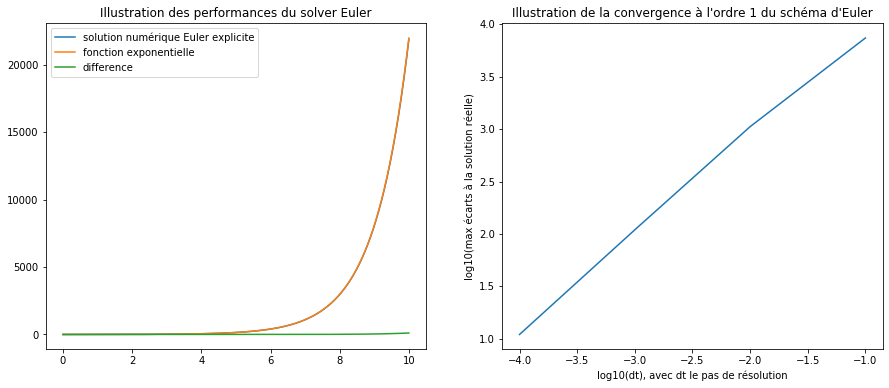

In [6]:
f = lambda t, x : x
time, num_solution_euler = solve_euler_explicit(f, 1, 0.001, 10)
Y = np.exp(time)
Z = [y - x for y, x in zip(Y, num_solution_euler)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
log_list_dt, log_max_difference_euler = convergence_euler(f, 1, 10)
ax1.plot(time, num_solution_euler, label = 'solution numérique Euler explicite')
ax1.plot(time, Y, label = 'fonction exponentielle')
ax1.plot(time, Z, label = 'difference')
ax1.set_title("Illustration des performances du solver Euler")
ax1.legend()
ax2.plot(log_list_dt, log_max_difference_euler)
ax2.set_title("Illustration de la convergence à l'ordre 1 du schéma d'Euler")
ax2.set(xlabel = 'log10(dt), avec dt le pas de résolution', ylabel = \
    'log10(max écarts à la solution réelle)')
plt.show()

### Question 2 : schéma de Runge-Kutta à l'ordre 2
Pour cette question, nous avons choisi le schéma de Runge-Kutta à l'ordre 2. Nous comparons l'ordre de convergence avec le schéma d'Euler explicite toujours sur l'équation différentielle canonique $\dot x(t) = x(t) \;\; \forall t \in \left[t_{0}, t_{f}\right]$.

In [7]:
def solve_runge_kutta_ordre_2(f, x0, dt, tf, t0=0):
    ''''Résout l'équation différentielle dx/dt(t) = f(t, x) à l'aide de la
    méthode de Rune_Kutta à l'ordre 2. Renvoie les listes temps et solution.'''
    T = tf - t0
    nbiter = math.floor(T/dt)
    temps = [i * dt for i in range(nbiter)]
    solution = [x0]
    for i in range(1, nbiter):
        F1 = f(i * dt, solution[i-1])
        F2 = f((i+1) * dt, solution[i-1] + dt * F1)
        solution.append(solution[i-1] + dt/2 * (F1 + F2))
    return temps, solution

In [8]:
def convergence_runge_kutta(f, x0, tf, t0=0, nbiter=4):
    ''' Pour l'équation différentielle canonique dx/dt = x, retourne le log10
    du maximum des écarts à la solution réelle en fonction du log10 de dt.
    Permet une lecture graphique de l'ordre de convergence du schéma de
    Runge-Kutta. Exécute le schéma de Runge-Kutta pour dt allant de 0.1 à
    0.1/10**nbiter.'''
    dt0 = 0.1
    list_dt = [dt0/10**i for i in range(nbiter)]
    max_difference = []
    for dt in list_dt:
        temps, num_solution = solve_runge_kutta_ordre_2(f, x0, dt, tf, t0)
        num_solution = np.array(num_solution)
        real_solution = np.array([np.exp(t) for t in temps])
        difference = abs(num_solution - real_solution)
        max_error = max(difference)
        max_difference.append(max_error)
    log_list_dt = np.log10(list_dt)
    log_max_difference = np.log10(max_difference)
    return log_list_dt, log_max_difference

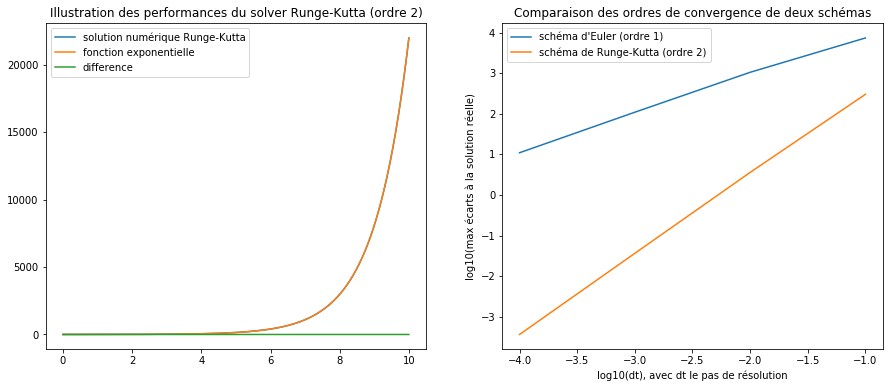

In [9]:
time, num_solution_runge = solve_runge_kutta_ordre_2(f, 1, 0.001, 10)
Z = [y - x for y, x in zip(Y, num_solution_runge)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))
log_list_dt, log_max_difference_runge = convergence_runge_kutta(f, 1, 10)
ax1.plot(time, num_solution_runge, label = 'solution numérique Runge-Kutta')
ax1.plot(time, Y, label = 'fonction exponentielle')
ax1.plot(time, Z, label = 'difference')
ax1.set_title("Illustration des performances du solver Runge-Kutta (ordre 2)")
ax1.legend()
ax2.plot(log_list_dt, log_max_difference_euler, label = "schéma d'Euler (ordre 1)")
ax2.plot(log_list_dt, log_max_difference_runge, label = 'schéma de Runge-Kutta (ordre 2)')
ax2.set_title("Comparaison des ordres de convergence de deux schémas")
ax2.set(xlabel = 'log10(dt), avec dt le pas de résolution', ylabel = \
    'log10(max écarts à la solution réelle)')
ax2.legend()
plt.show()

## Adaptation du pas de temps
### Question 3 : calcul de $\left\| e^{j+1} \right\|$ pour un schéma d'Euler explicite avec $f \;\mathcal{C}^{1}$

Copier le calcul

### Question 4 : adaptation du pas de temps

Copier le calcul

### Question 5 : solveur `solve_explicit_variable_step`

In [ ]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin=1e-16, dtmax=0.01, atol=1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

Ce solveur permet une résolution numérique de l'équation différentielle $\dot x(t) = f(x(t)) \;\; \forall t \in \left[t_{0}, t_{f}\right]$ avec un pas de temps qui varie selon que l'erreur estimée à chaque itération est plus grande ou plus petite qu'une tolérance fixée à `atol`. \
* $t_{i}$ permet de stocker la valeur de x dans xs avec un pas d'exactement $dt_{max}$. Ce solveur renvoie donc une 